#### 1. sklearn 라이브러리의 iris 데이터 불러오기

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
iris_dataset = datasets.load_iris()

In [5]:
print("iris_dataset key:{}".format(iris_dataset.keys()))

iris_dataset key:dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print(iris_dataset['target'])
print(iris_dataset['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [7]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 2. 데이터 분리

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_feat, test_feat, train_label, test_label = train_test_split(iris_dataset['data'],
                                                                  iris_dataset['target'],
                                                                  test_size = 0.3, random_state = 42)

In [10]:
train_feat.shape

(105, 4)

In [11]:
train_label.shape

(105,)

In [12]:
# random_state 확인
train_feat == train_feat1

NameError: name 'train_feat1' is not defined

#### 3. 다양한 머신러닝 분류 기법

##### 3.1 k-nearest neighbor 

[Minkowski Distance](https://en.wikipedia.org/wiki/Minkowski_distance)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [57]:
# 1. 모든 feature 사용

X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 35)

In [9]:
np.bincount(y_train)

array([34, 36, 35], dtype=int64)

In [58]:
# 모델 객체 생성
clf = KNeighborsClassifier(n_neighbors = 3)

In [10]:
# 모델 훈련
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
# 예측
predict_label = clf.predict(X_test)

In [12]:
# 정확도
predict_label == y_test

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [13]:
print('test accuracy {:.2f}'.format(np.mean(predict_label == y_test)))

test accuracy 0.91


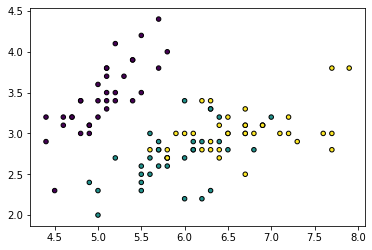

In [14]:
plt.scatter(X_train[:,0], X_train[:,1], edgecolor = 'k', s=20, c = y_train)

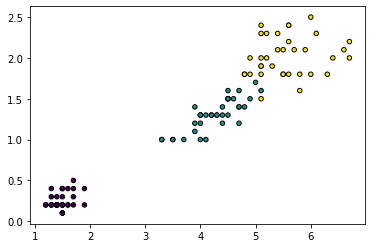

In [16]:
plt.scatter(X_train[:,2], X_train[:,3], edgecolor = 'k', s=20, c = y_train)

In [20]:
print("트레인 세트 정확도: {:.2f}".format(clf.score(X_train, y_train)))

트레인 세트 정확도: 0.99


In [21]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.91


###### 산점도 행렬 보기

In [17]:
import pandas as pd

In [18]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

In [1]:
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (15,15),
                           marker = 'o', hist_kwds={'bins':20}, s = 60,
                           alpha = 0.8)

NameError: name 'pd' is not defined

## [연습] 품종 컬럼 포함 5 by 5 산점도 행렬 그리기

In [34]:
iris_dataframe1

NameError: name 'iris_dataframe1' is not defined

In [35]:
column_names = iris_dataset.feature_names[0:4] + ['Species']
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'Species']

In [28]:
iris_dataframe1 = pd.DataFrame(y_train, columns = ['Species'])

In [29]:
iris_dataframe2 = pd.merge(iris_dataframe, iris_dataframe1, how='left', 
                           left_index = True, right_index = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2A998C208>,
      dtype=object)

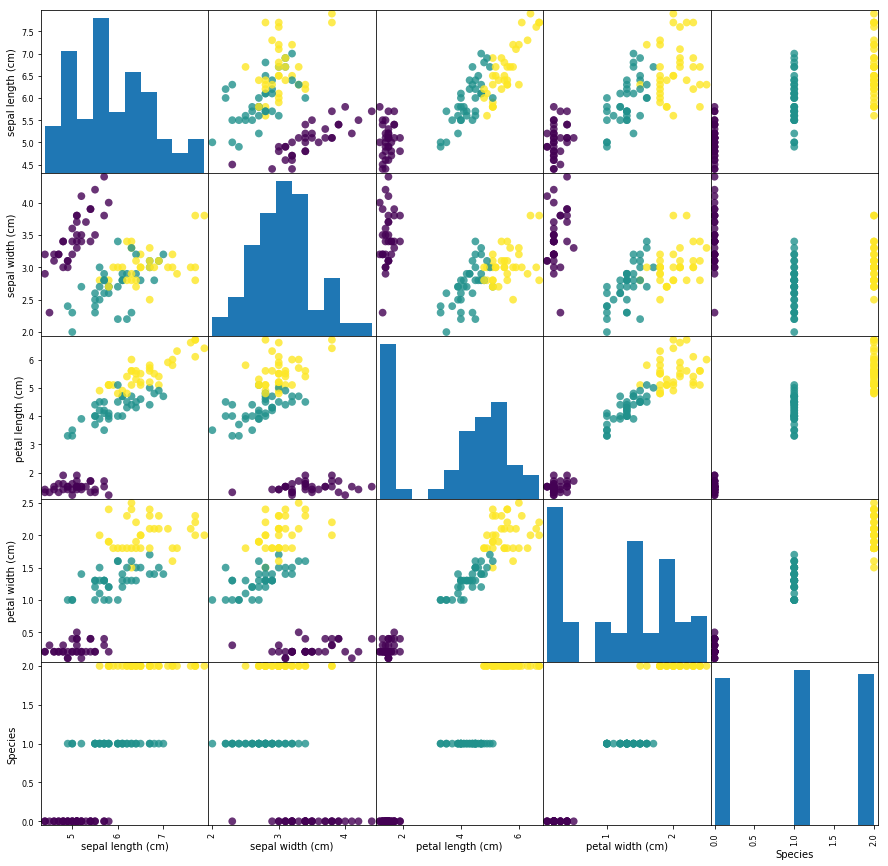

In [30]:
pd.plotting.scatter_matrix(iris_dataframe2, figsize = (15,15),
                           marker = 'o', hist_kwds={'bins':10}, s = 60,
                           alpha = 0.8, c=y_train)

### [연습] 위에서 시각화한 아래 그래프의 레이블 레전드를 표시해보세요

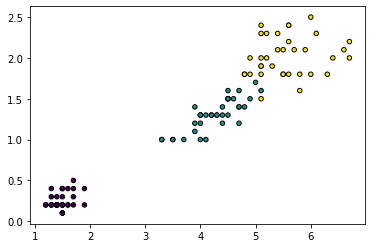

In [15]:
plt.scatter(X_train[:,2], X_train[:,3], edgecolor = 'k', s=20, c = y_train)

### 방안 1

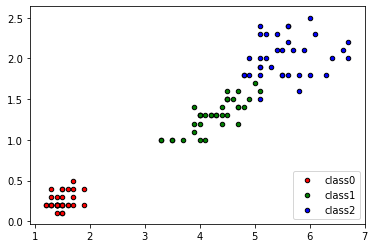

In [8]:
mask0 = y_train == 0
mask1 = y_train == 1
mask2 = y_train == 2

plt.scatter(X_train[mask0,2], X_train[mask0,3], edgecolor = 'k', s=20, c = 'r', label = 'class0')
plt.scatter(X_train[mask1,2], X_train[mask1,3], edgecolor = 'k', s=20, c = 'g', label = 'class1')
plt.scatter(X_train[mask2,2], X_train[mask2,3], edgecolor = 'k', s=20, c = 'b', label = 'class2')

plt.legend(loc=4)

### 방안 2

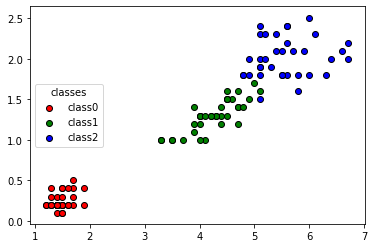

In [15]:
fig, ax = plt.subplots()
colors = ['r','g','b']
classes = [0,1,2]

for i, color in zip(classes, colors):
    idx = y_train == i
    ax.scatter(X_train[idx,2], X_train[idx,3], edgecolor = 'k', c = color, label = 'class{}'.format(i))
    ax.legend(loc = 'center left', title = 'classes')

### 방안 3

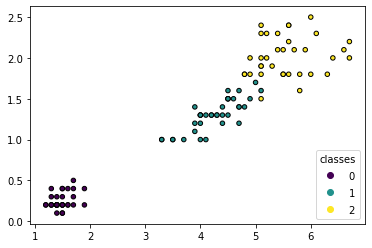

In [11]:
fig, ax = plt.subplots()
scatter = ax.scatter(X_train[:,2], X_train[:,3], edgecolor = 'k', s=20, c = y_train)

ax.legend(*scatter.legend_elements(), loc='lower right', title = 'classes')

In [35]:
ax.legend(*scatter.legend_elements())

AttributeError: 'PathCollection' object has no attribute 'legend_elements'

In [34]:
## 적절한 k 값 찾기 1

In [35]:
# 모델 객체 생성
clf1 = KNeighborsClassifier(n_neighbors = 3)

In [36]:
# 모델 훈련
clf1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [37]:
# 예측
predict_label = clf1.predict(X_test)

In [38]:
print("트레인 세트 정확도: {:.2f}".format(clf1.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(clf1.score(X_test, y_test)))

트레인 세트 정확도: 0.99
테스트 세트 정확도: 0.91


In [ ]:
## 적절한 k 값 찾기 2

In [39]:
# 모델 객체 생성
clf2 = KNeighborsClassifier(n_neighbors = 7)

# 모델 훈련
clf2.fit(X_train, y_train)

# 예측
predict_label = clf2.predict(X_test)

# 결과
print("트레인 세트 정확도: {:.2f}".format(clf2.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(clf2.score(X_test, y_test)))

트레인 세트 정확도: 0.99
테스트 세트 정확도: 0.96


In [ ]:
# 2. 2개의 feature 사용

In [40]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
## data split
X1 = iris_dataset.data[:, 2:4]
y1 = iris_dataset.target

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 35)

In [42]:
## 데이터 확인
X1_train == X_train[:,2:4]

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ Tr

In [43]:
np.bincount(y_train)

array([34, 36, 35], dtype=int64)

(array([34.,  0.,  0.,  0.,  0., 36.,  0.,  0.,  0., 35.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

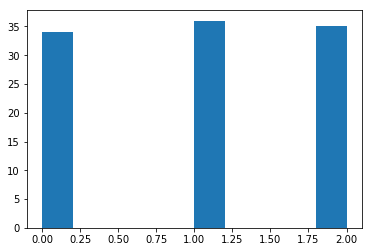

In [44]:
plt.hist(y_train)

In [45]:
# 모델 객체 생성
clf3 = KNeighborsClassifier(n_neighbors = 21)

In [46]:
# 모델 훈련
clf3.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [47]:
# 예측
predict_label = clf3.predict(X1_test)

In [48]:
# 정확도
predict_label == y1_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [49]:
print('test accuracy {:.2f}'.format(np.mean(predict_label == y_test)))

test accuracy 0.96


AttributeError: 'PathCollection' object has no attribute 'legend_elements'

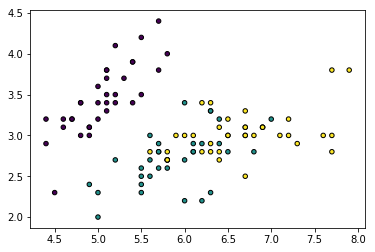

In [37]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_train[:,0], X_train[:,1], edgecolor = 'k', s=20, c = y_train)
ax.legend(*scatter.legend_elements(), loc='lower right', title = 'class')

In [51]:
print("테스트 세트 정확도: {:.2f}".format(clf3.score(X1_test, y1_test)))

테스트 세트 정확도: 0.96


In [52]:
print("트레인 세트 정확도: {:.2f}".format(clf3.score(X1_train, y1_train)))

트레인 세트 정확도: 0.96


###### Graph_Advanced

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [140]:
# data load
iris_dataset = datasets.load_iris()

## data split
X1 = iris_dataset.data[:, 2:4]
y1 = iris_dataset.target

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 35)

# 모델 객체 생성
clf3 = KNeighborsClassifier(n_neighbors = 21)

# 모델 훈련
clf3.fit(X1_train, y1_train)

# 예측
predict_label = clf3.predict(X1_test)

# 정확도
predict_label == y1_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [154]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [156]:
h = 0.02 # step size in the mesh

x_min, x_max = X1[:, 0].min() - 0.5, X1[:, 0].max() + 2
y_min, y_max = X1[:, 1].min() - 0.5, X1[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

(-0.4, 4.480000000000004)

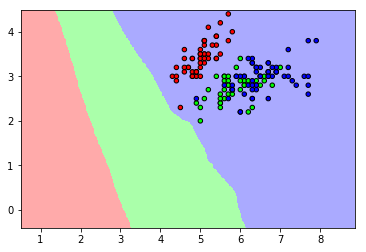

In [157]:
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y1, cmap = cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-0.4, 4.480000000000004)

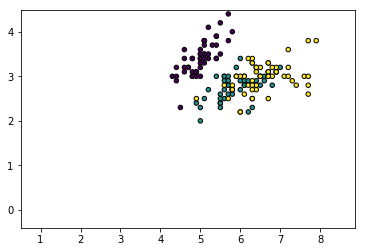

In [152]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

## [예제]
## 사이킷런의 load_breast_cancer 데이터를 이용하여 
## n_neighbors를 1~11까지 변화시켜가며 트레인 정확도와  
## 테스트 정확도 그래프를 확인하고 가장 적절한 k값을 판단해보세요

In [38]:
from sklearn.datasets import load_breast_cancer

In [39]:
# 1. 데이터 불러오기
cancer = load_breast_cancer()

In [40]:
# 2. 데이터 확인
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [33]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [161]:
np.count_nonzero(cancer.data[0])

30

In [5]:
# 3, 데이터 분할
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)

In [6]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [9]:
# 4. 모델링(반복문)

train_accuracy = []
test_accuracy = []

n_neighbors = range(1,12)

for n_neighbor in n_neighbors:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbor)
    clf.fit(X_train, y_train)
    
    # 훈련 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))
    
    # 테스트 정확도
    test_accuracy.append(clf.score(X_test, y_test))

In [12]:
### 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [63]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[19]

'C:\\WINDOWS\\Fonts\\REFSPCL.TTF'

In [13]:
font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

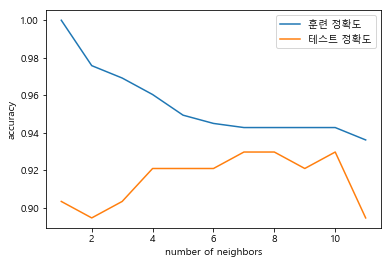

In [14]:
plt.plot(n_neighbors, train_accuracy, label = "훈련 정확도")
plt.plot(n_neighbors, test_accuracy, label = '테스트 정확도')
plt.ylabel("accuracy")
plt.xlabel("number of neighbors")
plt.legend()

##### 3.2 Decision Tree 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
iris_dataset = load_iris()

In [16]:
## data split
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 58)

In [17]:
# 객체 생성
clf = tree.DecisionTreeClassifier(max_depth = None, random_state = 0)

In [18]:
# 모델링
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [19]:
print("훈련 세트 점수: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(clf.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.933


###### tree graph

#conda install graphviz
#conda install python-graphviz

###### 경로 설정
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Users/royyk/Anaconda3/Library/bin/graphviz/'

In [25]:
import os
import sys

In [26]:
print('\n'.join(sys.path))

C:\pywork{
}C:\ProgramData\Anaconda3\python37.zip{
}C:\ProgramData\Anaconda3\DLLs{
}C:\ProgramData\Anaconda3\lib{
}C:\ProgramData\Anaconda3{
}{
}C:\ProgramData\Anaconda3\lib\site-packages{
}C:\ProgramData\Anaconda3\lib\site-packages\win32{
}C:\ProgramData\Anaconda3\lib\site-packages\win32\lib{
}C:\ProgramData\Anaconda3\lib\site-packages\Pythonwin{
}C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions{
}C:\Users\User\.ipython


In [43]:
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

In [44]:
# 그래프 생성
from sklearn.tree import export_graphviz
import graphviz # 설치 필요

In [45]:
export_graphviz(clf, out_file = "tree.dot",
                feature_names = iris_dataset.feature_names,
                class_names = iris_dataset.target_names,
                rounded = True, proportion = False,
                filled = True, precision = 2)

In [46]:
with open("tree.dot") as f:
    dot_graph = f.read()

In [47]:
dot_graph

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="petal width (cm) <= 0.8\\ngini = 0.66\\nsamples = 105\\nvalue = [39, 31, 35]\\nclass = setosa", fillcolor="#fef8f4"] ;\n1 [label="gini = 0.0\\nsamples = 39\\nvalue = [39, 0, 0]\\nclass = setosa", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.75\\ngini = 0.5\\nsamples = 66\\nvalue = [0, 31, 35]\\nclass = virginica", fillcolor="#f1e8fc"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length (cm) <= 5.05\\ngini = 0.16\\nsamples = 34\\nvalue = [0, 31, 3]\\nclass = versicolor", fillcolor="#4ce88d"] ;\n2 -> 3 ;\n4 [label="sepal length (cm) <= 5.0\\ngini = 0.06\\nsamples = 31\\nvalue = [0, 30, 1]\\nclass = versicolor", fillcolor="#40e685"] ;\n3 -> 4 ;\n5 [label="petal width (cm) <= 1.35\\ngini = 0.5\\nsamples = 2\\nvalue = [0, 1, 1]\\nclass = versicol

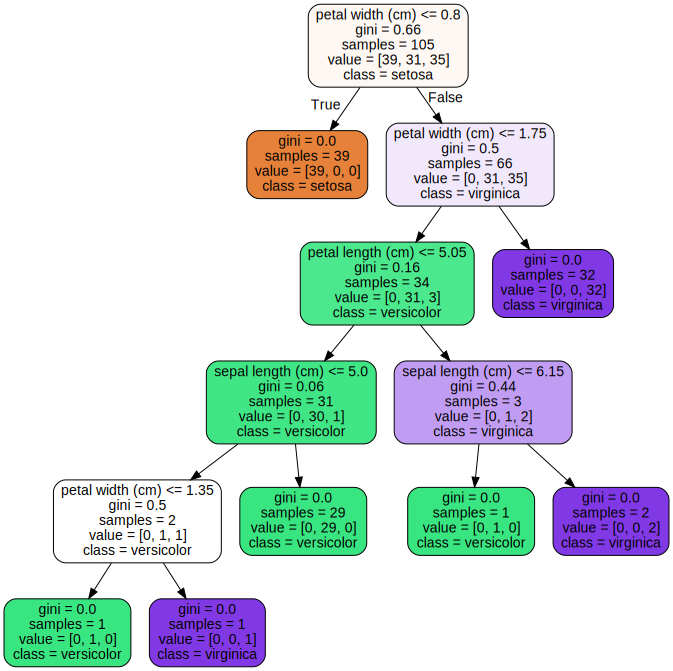

In [48]:
graphviz.Source(dot_graph)

* 결정트리의 복잡도 제어 --> 과대적합의 방지

- 사전가지치기
- 사후가지치기

In [54]:
# 객체 생성
clf1 = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)

In [55]:
# 모델링
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [38]:
print("훈련 세트 점수: {:.3f}".format(clf1.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(clf1.score(X_test, y_test)))

훈련 세트 점수: 0.981
테스트 세트 점수: 0.956


* 변수 중요도(feature importance) --> 0 ~ 1사이 값

In [41]:
### 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

In [42]:
font_name = fm.FontProperties(fname = 'C:\\WINDOWS\\Fonts\\malgun.TTF')
font_name.get_name()
rc('font', family = font_name.get_name())

In [54]:
# 변수 중요도 보기
clf1.feature_importances_

array([0.        , 0.        , 0.03314601, 0.96685399])

(-1, 4)

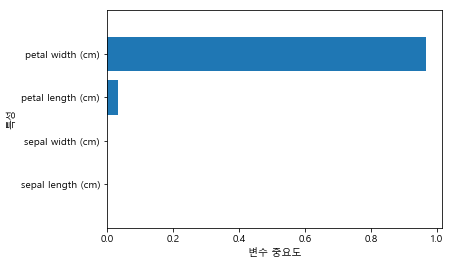

In [43]:
n_features = iris_dataset.data.shape[1]
plt.barh(range(n_features), clf1.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), iris_dataset.feature_names)
plt.xlabel("변수 중요도",)
plt.ylabel('특성')
plt.ylim(-1,n_features)

###### 예제 : load_breast_cancer

In [159]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [160]:
# 1. 데이터 불러오기

cancer = datasets.load_breast_cancer()

In [19]:
# 2. 데이터 확인

print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [161]:
# 3. 데이터 나누기

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [162]:
# 3,1 분할 데이터 확인

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [163]:
# 4, 모델링

# 4.1 객체 생성

clf = DecisionTreeClassifier(max_depth = None, random_state=1)

In [164]:
# 4.2 모델 적합

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [165]:
# 5. 훈련 결과 확인

print("훈련 세트 점수: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(clf.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.912


In [30]:
# 6. 그래프 모듈 로딩

from sklearn.tree import export_graphviz
import graphviz

In [46]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/royyk/Anaconda3/Library/bin/graphviz/'

In [37]:
# 6,1 그래프 확인

export_graphviz(clf, out_file = "cancer_tree.dot",
                feature_names = cancer.feature_names,
                class_names = cancer.target_names,
                rounded = True, proportion = False,
                filled = True, precision = 2)

In [38]:
with open("cancer_tree.dot") as f:
    cancer_dot_graph = f.read()

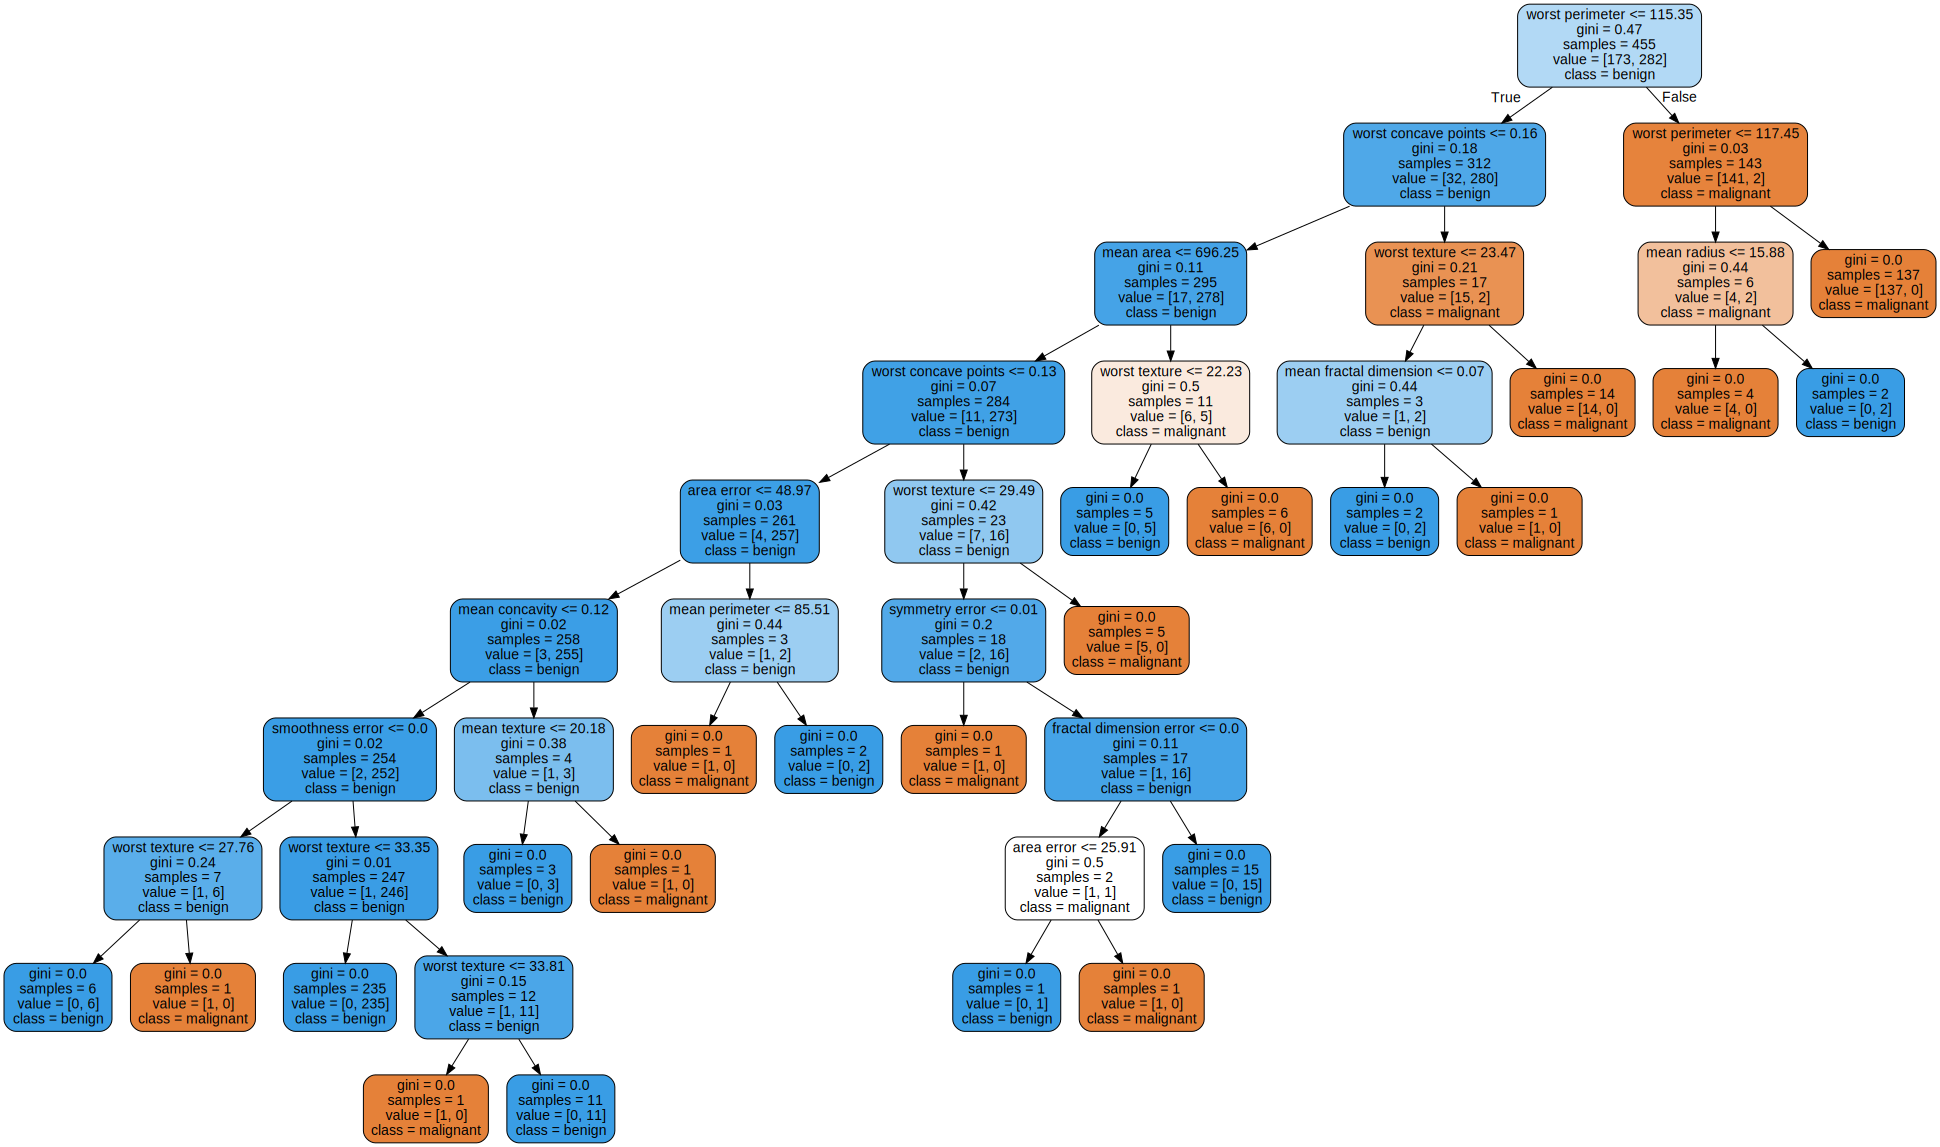

In [47]:
graphviz.Source(cancer_dot_graph)

In [48]:
cancer_graph = graphviz.Source(cancer_dot_graph)

In [51]:
cancer_graph.format = 'png'
cancer_graph.render(filename='cancer_tree')

'cancer_tree.png'

In [ ]:
# 7. 가지치기

In [52]:
# 7.1 max depth 변화에 따른 훈련 / 테스트 정확도 변화 리스트 작성

train_accuracy = []
test_accuracy = []

depths = range(1,8)

for depth in depths:
    
    # 객체 생성
    clf = DecisionTreeClassifier(max_depth = depth)
    
    # 모델 적합
    clf.fit(X_train, y_train)
    
    # 훈련 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))
    
    # 테스트 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

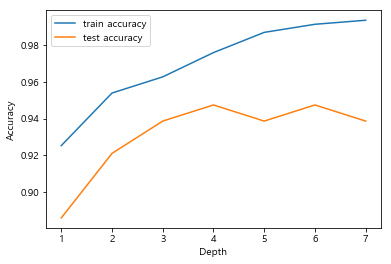

In [53]:
# 7.2 변화 그래프 확인

plt.plot(depths, train_accuracy, label = "train accuracy")
plt.plot(depths, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

In [54]:
# 7.3 사전가지치기

# 객체 생성
clf = DecisionTreeClassifier(max_depth = 4)
    
# 모델 적합
clf.fit(X_train, y_train)

# 훈련 결과 확인

print("훈련 세트 점수: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(clf.score(X_test, y_test)))

훈련 세트 점수: 0.976
테스트 세트 점수: 0.930


In [55]:
# 8,1 그래프 재확인

export_graphviz(clf, out_file = "cancer_tree1.dot",
                feature_names = cancer.feature_names,
                class_names = cancer.target_names,
                rounded = True, proportion = False,
                filled = True, precision = 2)

In [57]:
with open("cancer_tree1.dot") as f:
    cancer_dot_graph1 = f.read()

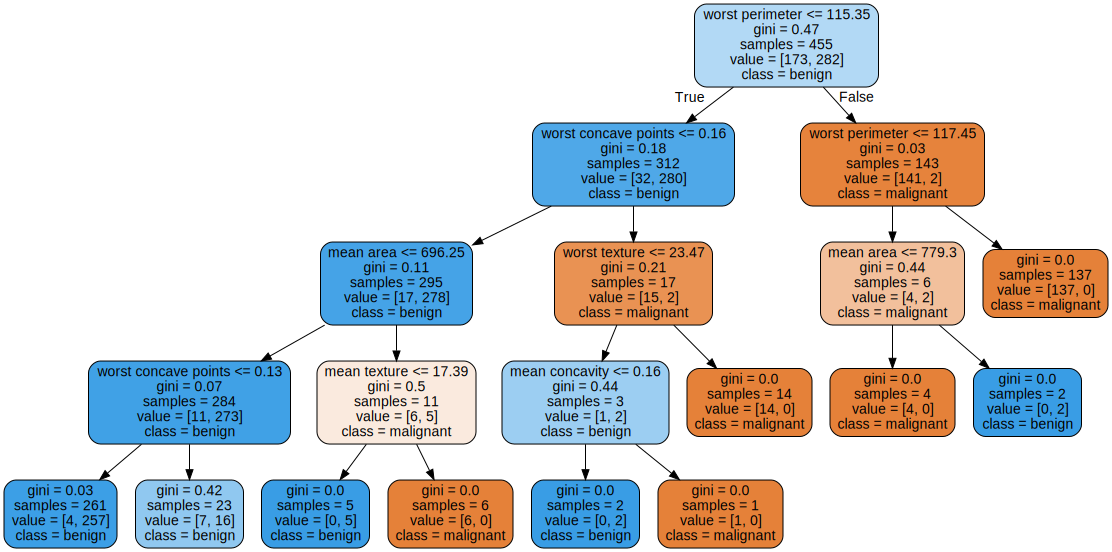

In [58]:
graphviz.Source(cancer_dot_graph1)